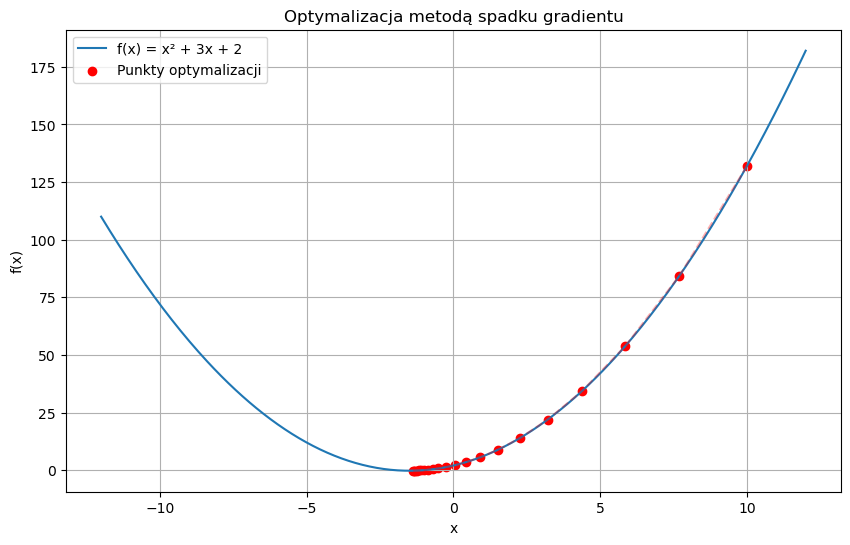

Znalezione minimum: x = -1.3674, f(x) = -0.2324
Prawdziwe minimum: x = -1.5, f(x) = -0.25


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Definicja funkcji i jej pochodnej
def f(x):
    return x**2 + 3*x + 2

def df(x):
    return 2*x + 3

# Parametry spadku gradientu
learning_rate = 0.1
n_iterations = 20
x_start = 10  
x_history = [x_start]
y_history = [f(x_start)]

# Spadek gradientu
x = x_start
for _ in range(n_iterations):
    gradient = df(x)
    x = x - learning_rate * gradient
    x_history.append(x)
    y_history.append(f(x))

# Wizualizacja
fig, ax = plt.subplots(figsize=(10, 6))
x_vals = np.linspace(-12, 12, 400)
ax.plot(x_vals, f(x_vals), label='f(x) = x² + 3x + 2')
ax.scatter(x_history, y_history, c='red', label='Punkty optymalizacji')
ax.plot(x_history, y_history, 'r--', alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Optymalizacja metodą spadku gradientu')
ax.legend()
ax.grid(True)
plt.show()

# Znaleziony minimum
print(f"Znalezione minimum: x = {x_history[-1]:.4f}, f(x) = {y_history[-1]:.4f}")
print(f"Prawdziwe minimum: x = {-1.5}, f(x) = {-0.25}")

Epoch [100/500], Loss: 0.0255
Epoch [200/500], Loss: 0.0243
Epoch [300/500], Loss: 0.0236
Epoch [400/500], Loss: 0.0233
Epoch [500/500], Loss: 0.0232


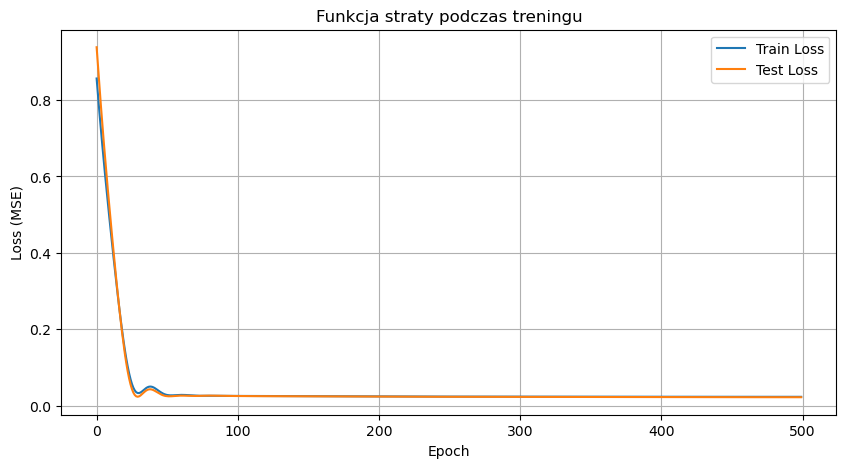

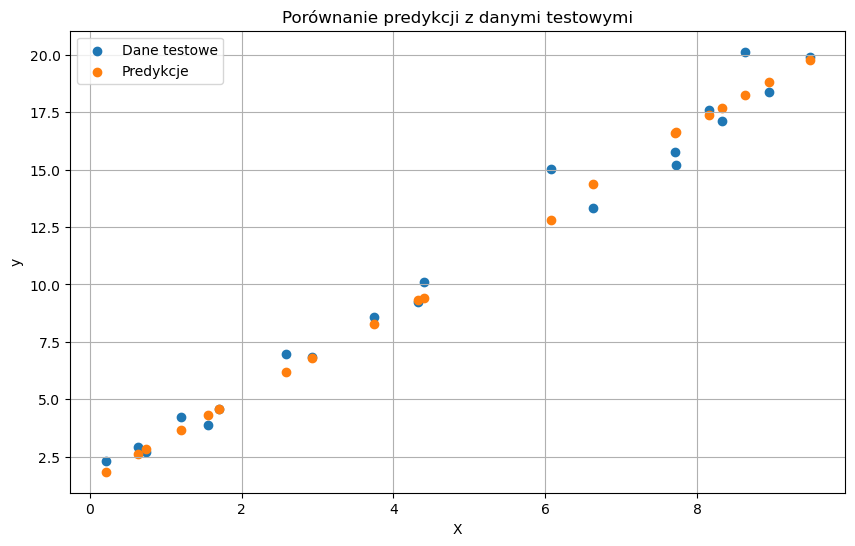

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generowanie danych
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 punktów w zakresie [0, 10]
y = 2*X + 1 + np.random.randn(100, 1)  # y = 2x + 1 + szum

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Konwersja do tensorów PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

# Definicja modelu
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Funkcja kosztu i optymalizator
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Trening
n_epochs = 500
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass i optymalizacja
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Zapisanie strat
    train_losses.append(loss.item())
    
    # Obliczenie straty na zbiorze testowym
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

# Wykres funkcji straty
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Funkcja straty podczas treningu')
plt.legend()
plt.grid(True)
plt.show()

# Predykcje
with torch.no_grad():
    predicted = model(X_test_tensor).numpy()

# Odwrócenie standaryzacji
predicted_original = scaler_y.inverse_transform(predicted)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test_original, label='Dane testowe')
plt.scatter(X_test, predicted_original, label='Predykcje')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Porównanie predykcji z danymi testowymi')
plt.legend()
plt.grid(True)
plt.show()

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:05<00:00, 1.71MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 239kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.50MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]


Epoch [1/5], Train Loss: 0.1597, Train Acc: 95.19%, Test Loss: 0.0529, Test Acc: 98.27%
Epoch [2/5], Train Loss: 0.0461, Train Acc: 98.55%, Test Loss: 0.0375, Test Acc: 98.70%
Epoch [3/5], Train Loss: 0.0319, Train Acc: 99.00%, Test Loss: 0.0354, Test Acc: 98.77%
Epoch [4/5], Train Loss: 0.0228, Train Acc: 99.28%, Test Loss: 0.0318, Test Acc: 99.00%
Epoch [5/5], Train Loss: 0.0168, Train Acc: 99.50%, Test Loss: 0.0319, Test Acc: 99.09%


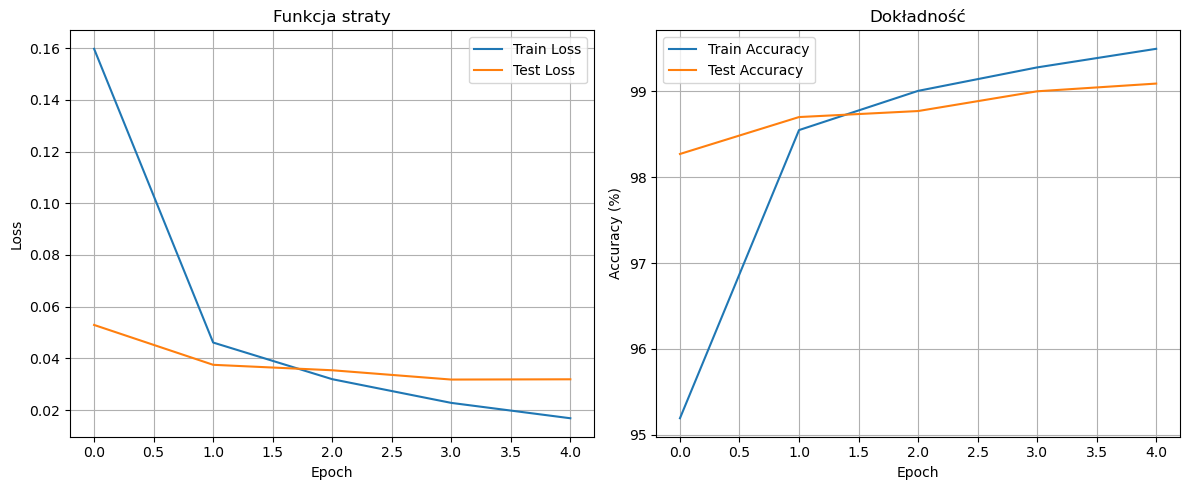

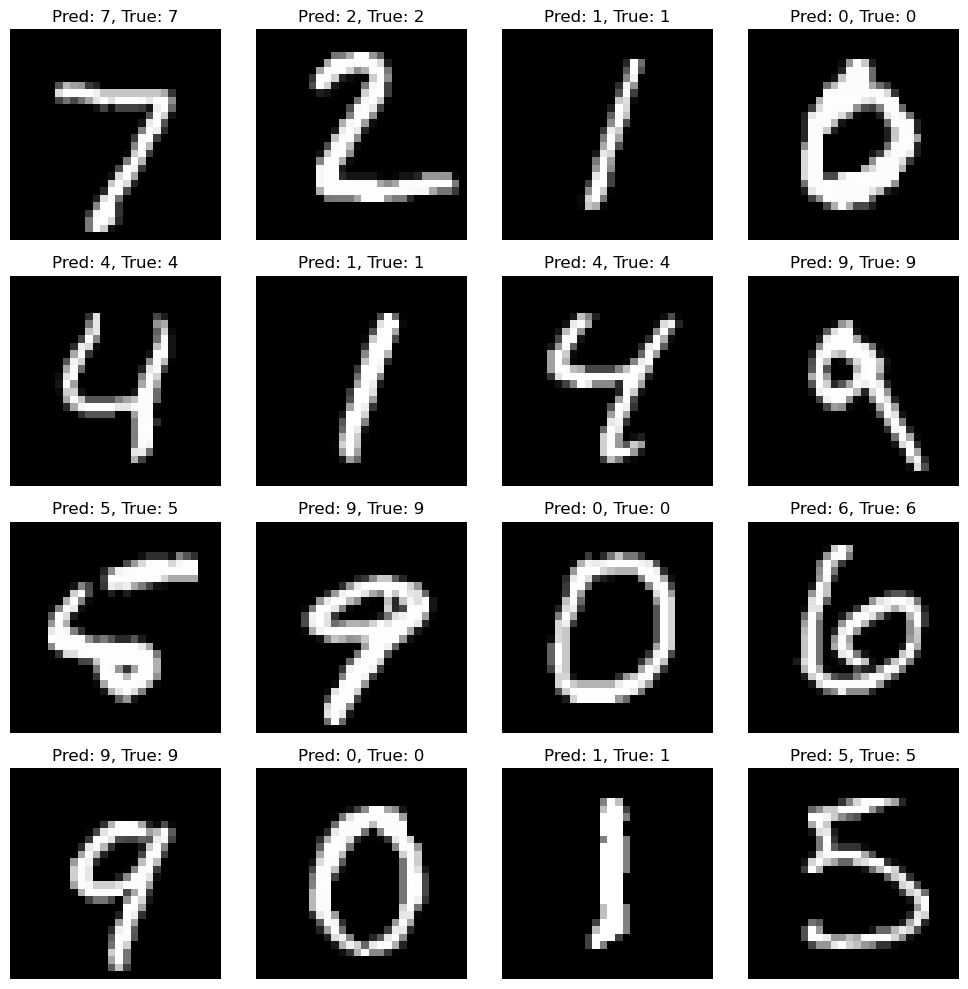

In [20]:
%pip install torchvision
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transformacje danych
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Ładowanie danych MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definicja modelu CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64*7*7)  # Spłaszczenie
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

# Funkcja kosztu i optymalizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trening
n_epochs = 5
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(n_epochs):
    # Trening
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass i optymalizacja
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Statystyki
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Testowanie
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{n_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')

# Wykresy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Funkcja straty')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Dokładność')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Przykładowe predykcje
model.eval()
with torch.no_grad():
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Wizualizacja przykładowych wyników
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted[i].item()}, True: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()